In [1]:
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

sorted_2016 = pd.read_csv('../Data/Cleaned files/sorted_2016.csv')  # Load in our cleaned file

sorted_2016_sample = sorted_2016[sorted_2016['Assn Type'].isin(['REG'])]

## Visuals
unique_companies_2016 = sorted_2016_sample['Address1'].unique()  # Pull out the individual names

total_nv_network_2016 = gt.Graph()  # Create a graph

# Adding vertices
hoa_vertices = {}
company_vertices = {}

company_name_prop = total_nv_network_2016.new_vertex_property("string")
company_city_prop = total_nv_network_2016.new_vertex_property("string")
company_state_prop = total_nv_network_2016.new_vertex_property("string") 

for company_2016 in unique_companies_2016:
    company_data_2016 = sorted_2016_sample[sorted_2016_sample['Address1'] == company_2016]
    company_vertex = total_nv_network_2016.add_vertex()
    company_vertices[company_2016] = company_vertex
    company_name_prop[company_vertex] = company_2016

    # Extract city information for the first record
    city = company_data_2016.iloc[0]['City']  # Assuming the city information is in the first row of the group
    state = company_data_2016.iloc[0]['State']  # Assuming the state information is in the first row of the group
    company_city_prop[company_vertex] = city  # Assign city information to the vertex property
    company_state_prop[company_vertex] = state # Assign state information to the vertex property
    
    for index, row in company_data_2016.iterrows():
        hoa_name = row['Name']
        if hoa_name not in hoa_vertices:
            hoa_vertex = total_nv_network_2016.add_vertex()
            hoa_vertices[hoa_name] = hoa_vertex
        else:
            hoa_vertex = hoa_vertices[hoa_name]
        total_nv_network_2016.add_edge(hoa_vertex, company_vertex)

# Draw the graph with customized vertex colors
pos = gt.sfdp_layout(total_nv_network_2016, K=10)

# Assign colors to vertices based on their type (HOA or management company)
vertex_color = total_nv_network_2016.new_vertex_property("vector<double>")

for v in total_nv_network_2016.vertices():
    if v in company_vertices.values():
        city = company_city_prop[v]
        state = company_state_prop[v]
        if state != "NV":
            vertex_color[v] = (0.5, 0, 0.5, 0.75)  # Purple color for companies outside NV
        elif city in ["Las Vegas", "Henderson", "North Las Vegas", "Paradise", "Spring Valley", "Summerlin South", "Sunrise Manor", "Enterprise", "Winchester", "Whitney"]:
            vertex_color[v] = (0, 1, 0, 0.75)  # Green color for Vegas MSA companies
        else:
            vertex_color[v] = (1, 0, 0, 0.75)  # Red color for other cities
    else:
        vertex_color[v] = (0, 0, 1, 0.75)  # Blue color for HOAs

gt.graph_draw(total_nv_network_2016, pos, vertex_fill_color=vertex_color, output_size=(1000, 1000), output="../output/2016_gt.png")

plt.show()

In [2]:
## Statistics
degrees = total_nv_network_2016.degree_property_map('total')
total_degree_centrality_sum = total_nv_network_2016.num_edges()
top_10 = sorted(total_nv_network_2016.vertices(), key=lambda v: degrees[v], reverse=True)[:10]
print("Top 10 Vertices by Degree Centrality:")
for i, vertex in enumerate(top_10):
    company_name = company_name_prop[vertex]
    degree_centrality = degrees[vertex]
    proportion_of_total = (degree_centrality / total_degree_centrality_sum)*100
    print(f"{i+1}. {company_name}, Number of HOAs: {degree_centrality}, Proportion of Total: {proportion_of_total:.1f}")

company_stats = sorted_2016_sample.groupby('Address1').agg({'# of Units': 'sum', 'Name': 'count'})
company_stats['Average Community Size'] = company_stats['# of Units'] / company_stats['Name']
company_stats['Average Community Size'] = company_stats['Average Community Size'].round()
top_10_average_community_size = company_stats.sort_values(by='Average Community Size', ascending=False).head(10)
print("Top 10 Companies by Average Community Size:")
print(top_10_average_community_size)

association_type_totals = sorted_2016_sample.groupby('Assn Type').size()
print("Total Number of Units for Each Association Type:")
print(association_type_totals)

Top 10 Vertices by Degree Centrality:
1. C/O Firstservice Residential Nevada, Llc, Number of HOAs: 246, Proportion of Total: 11.7
2. C/O Camco, Number of HOAs: 170, Proportion of Total: 8.1
3. C/O Terra West Management Services, Number of HOAs: 115, Proportion of Total: 5.5
4. C/O Taylor Association Management, Number of HOAs: 85, Proportion of Total: 4.0
5. C/O Colonial Property Management, Number of HOAs: 79, Proportion of Total: 3.8
6. C/O Associa Nevada South, Number of HOAs: 75, Proportion of Total: 3.6
7. C/O Community Management Group, Number of HOAs: 75, Proportion of Total: 3.6
8. C/O Thoroughbred Management, Number of HOAs: 70, Proportion of Total: 3.3
9. C/O Nicklin Property Management, Number of HOAs: 58, Proportion of Total: 2.8
10. C/O Incline Property Management, Number of HOAs: 53, Proportion of Total: 2.5
Top 10 Companies by Average Community Size:
                                                    # of Units  Name  \
Address1                                          

In [3]:
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

sorted_2020 = pd.read_csv('../Data/Cleaned files/sorted_2020.csv')  

sorted_2020_sample = sorted_2020[sorted_2020['Assn Type'].isin(['REG'])]

## Visuals
unique_companies_2020 = sorted_2020_sample['Address1'].unique()  

total_nv_network_2020 = gt.Graph()  

# Adding vertices
hoa_vertices = {}
company_vertices = {}

company_name_prop = total_nv_network_2020.new_vertex_property("string")
company_city_prop = total_nv_network_2020.new_vertex_property("string")
company_state_prop = total_nv_network_2020.new_vertex_property("string")
company_community_size_prop = total_nv_network_2020.new_vertex_property("int")  

for company_2020 in unique_companies_2020:
    company_data_2020 = sorted_2020_sample[sorted_2020_sample['Address1'] == company_2020]
    company_vertex = total_nv_network_2020.add_vertex()
    company_vertices[company_2020] = company_vertex
    company_name_prop[company_vertex] = company_2020

    city = company_data_2020.iloc[0]['City']  
    state = company_data_2020.iloc[0]['State']
    company_city_prop[company_vertex] = city 
    company_state_prop[company_vertex] = state

    for index, row in company_data_2020.iterrows():
        hoa_name = row['Name']
        if hoa_name not in hoa_vertices:
            hoa_vertex = total_nv_network_2020.add_vertex()
            hoa_vertices[hoa_name] = hoa_vertex
        else:
            hoa_vertex = hoa_vertices[hoa_name]
        total_nv_network_2020.add_edge(hoa_vertex, company_vertex)


pos = gt.sfdp_layout(total_nv_network_2020, K=10)

vertex_color = total_nv_network_2020.new_vertex_property("vector<double>")
for v in total_nv_network_2020.vertices():
    if v in company_vertices.values():
        city = company_city_prop[v]
        state = company_state_prop[v]
        if state != "NV":
            vertex_color[v] = (0.5, 0, 0.5, 0.75)  
        elif city in ["Las Vegas", "Henderson", "North Las Vegas", "Paradise", "Spring Valley", "Summerlin South", "Sunrise Manor", "Enterprise", "Winchester", "Whitney"]:
            vertex_color[v] = (0, 1, 0, 0.75)  
        else:
            vertex_color[v] = (1, 0, 0, 0.75)  
    else:
        vertex_color[v] = (0, 0, 1, 0.75)  

gt.graph_draw(total_nv_network_2020, pos, vertex_fill_color=vertex_color, output_size=(1000, 1000), output="../output/2020_gt.png")

plt.show()

In [4]:
## Statistics
degrees = total_nv_network_2020.degree_property_map('total')
total_degree_centrality_sum = total_nv_network_2020.num_edges()
top_10 = sorted(total_nv_network_2020.vertices(), key=lambda v: degrees[v], reverse=True)[:10]
print("Top 10 Vertices by Degree Centrality:")
for i, vertex in enumerate(top_10):
    company_name = company_name_prop[vertex]
    degree_centrality = degrees[vertex]
    proportion_of_total = (degree_centrality / total_degree_centrality_sum)*100
    print(f"{i+1}. {company_name}, Number of HOAs: {degree_centrality}, Proportion of Total: {proportion_of_total:.1f}")

company_stats = sorted_2020_sample.groupby('Address1').agg({'# of Units': 'sum', 'Name': 'count'})
company_stats['Average Community Size'] = company_stats['# of Units'] / company_stats['Name']
company_stats['Average Community Size'] = company_stats['Average Community Size'].round()
top_10_average_community_size = company_stats.sort_values(by='Average Community Size', ascending=False).head(10)
print("Top 10 Companies by Average Community Size:")
print(top_10_average_community_size)

association_type_totals = sorted_2020_sample.groupby('Assn Type').size()
print("Total Number of Units for Each Association Type:")
print(association_type_totals)

Top 10 Vertices by Degree Centrality:
1. C/O Camco, Number of HOAs: 254, Proportion of Total: 10.5
2. C/O Firstservice Residential Nevada, Llc, Number of HOAs: 236, Proportion of Total: 9.8
3. C/O Terra West Management Services, Number of HOAs: 135, Proportion of Total: 5.6
4. C/O Thoroughbred Management, Number of HOAs: 95, Proportion of Total: 3.9
5. C/O Taylor Association Management, Number of HOAs: 93, Proportion of Total: 3.8
6. C/O Community Management Group, Number of HOAs: 91, Proportion of Total: 3.8
7. C/O Colonial Property Management, Number of HOAs: 82, Proportion of Total: 3.4
8. C/O Incline Property Management, Number of HOAs: 78, Proportion of Total: 3.2
9. C/O Associa Nevada South, Number of HOAs: 68, Proportion of Total: 2.8
10. C/O Nicklin Property Management, Number of HOAs: 64, Proportion of Total: 2.6
Top 10 Companies by Average Community Size:
                                                 # of Units  Name  \
Address1                                             

In [5]:
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

sorted_2024 = pd.read_csv('../Data/Cleaned files/sorted_2024.csv')  

sorted_2024_sample = sorted_2024[sorted_2024['Assn Type'].isin(['REG'])]

## Visuals
unique_companies_2024 = sorted_2024_sample['Address1'].unique()  

total_nv_network_2024 = gt.Graph()  

# Adding vertices
hoa_vertices = {}
company_vertices = {}

company_name_prop = total_nv_network_2024.new_vertex_property("string")
company_city_prop = total_nv_network_2024.new_vertex_property("string")
company_state_prop = total_nv_network_2024.new_vertex_property("string")
company_community_size_prop = total_nv_network_2024.new_vertex_property("int")  

for company_2024 in unique_companies_2024:
    company_data_2024 = sorted_2024_sample[sorted_2024_sample['Address1'] == company_2024]
    company_vertex = total_nv_network_2024.add_vertex()
    company_vertices[company_2024] = company_vertex
    company_name_prop[company_vertex] = company_2024

    city = company_data_2024.iloc[0]['City']  
    state = company_data_2024.iloc[0]['State']
    company_city_prop[company_vertex] = city  
    company_state_prop[company_vertex] = state

    for index, row in company_data_2024.iterrows():
        hoa_name = row['Name']
        if hoa_name not in hoa_vertices:
            hoa_vertex = total_nv_network_2024.add_vertex()
            hoa_vertices[hoa_name] = hoa_vertex
        else:
            hoa_vertex = hoa_vertices[hoa_name]
        total_nv_network_2024.add_edge(hoa_vertex, company_vertex)
        
pos = gt.sfdp_layout(total_nv_network_2024, K=10)

vertex_color = total_nv_network_2024.new_vertex_property("vector<double>")
for v in total_nv_network_2024.vertices():
    if v in company_vertices.values():
        city = company_city_prop[v]
        state = company_state_prop[v]
        if state != "NV":
            vertex_color[v] = (0.5, 0, 0.5, 0.75) 
        elif city in ["Las Vegas", "Henderson", "North Las Vegas", "Paradise", "Spring Valley", "Summerlin South", "Sunrise Manor", "Enterprise", "Winchester", "Whitney"]:
            vertex_color[v] = (0, 1, 0, 0.75) 
        else:
            vertex_color[v] = (1, 0, 0, 0.75)  
    else:
        vertex_color[v] = (0, 0, 1, 0.75)  

gt.graph_draw(total_nv_network_2024, pos, vertex_fill_color=vertex_color, output_size=(1000, 1000), output="../output/2024_gt.png")

plt.show()

In [6]:
## Statistics
degrees = total_nv_network_2024.degree_property_map('total')
total_degree_centrality_sum = total_nv_network_2024.num_edges()
top_10 = sorted(total_nv_network_2024.vertices(), key=lambda v: degrees[v], reverse=True)[:10]
print("Top 10 Vertices by Degree Centrality:")
for i, vertex in enumerate(top_10):
    company_name = company_name_prop[vertex]
    degree_centrality = degrees[vertex]
    proportion_of_total = (degree_centrality / total_degree_centrality_sum)*100
    print(f"{i+1}. {company_name}, Number of HOAs: {degree_centrality}, Proportion of Total: {proportion_of_total:.1f}")

company_stats = sorted_2024_sample.groupby('Address1').agg({'# of Units': 'sum', 'Name': 'count'})
company_stats['Average Community Size'] = company_stats['# of Units'] / company_stats['Name']
company_stats['Average Community Size'] = company_stats['Average Community Size'].round()
top_10_average_community_size = company_stats.sort_values(by='Average Community Size', ascending=False).head(10)
print("Top 10 Companies by Average Community Size:")
print(top_10_average_community_size)

association_type_totals = sorted_2024_sample.groupby('Assn Type').size()
print("Total Number of Units for Each Association Type:")
print(association_type_totals)

Top 10 Vertices by Degree Centrality:
1. C/O Firstservice Residential Nevada, Llc, Number of HOAs: 202, Proportion of Total: 7.7
2. C/O Camco, Number of HOAs: 177, Proportion of Total: 6.7
3. C/O Terra West Management Services, Number of HOAs: 171, Proportion of Total: 6.5
4. C/O Nevada Community Management, Llc, Number of HOAs: 144, Proportion of Total: 5.5
5. C/O The Management Trust, Number of HOAs: 102, Proportion of Total: 3.9
6. C/O Thoroughbred Management, Number of HOAs: 101, Proportion of Total: 3.8
7. C/O Taylor Association Management, Number of HOAs: 100, Proportion of Total: 3.8
8. C/O Colonial Property Management, Number of HOAs: 99, Proportion of Total: 3.8
9. C/O Associa Nevada South, Number of HOAs: 95, Proportion of Total: 3.6
10. C/O Incline Property Management, Number of HOAs: 75, Proportion of Total: 2.9
Top 10 Companies by Average Community Size:
                                                 # of Units  Name  \
Address1                                           

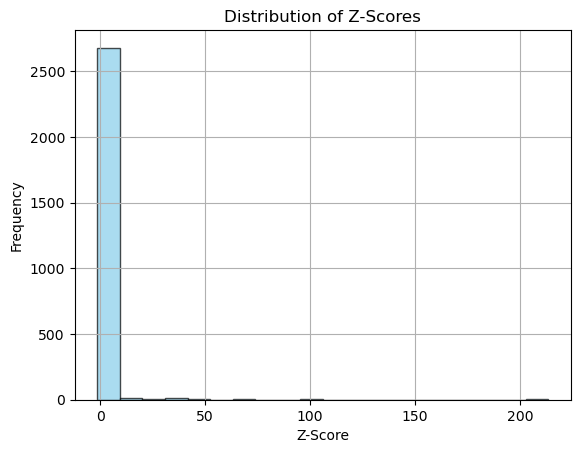

In [5]:
import pandas as pd
import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt

def rewire_edges(graph):
    num_edges = graph.num_edges()
    edges = list(graph.edges())
    np.random.shuffle(edges)  

    rewired_graph = gt.Graph(graph)  
    rewired_graph.clear_edges()  

    for edge in edges:
        source, target = edge
        possible_targets = [v for v in rewired_graph.vertices() if v != source and not rewired_graph.edge(source, v)]
        new_target = np.random.choice(possible_targets)
        rewired_graph.add_edge(source, new_target)

    return rewired_graph

sorted_2024 = pd.read_csv('../Data/Cleaned files/sorted_2024.csv')  

degrees_real = total_nv_network_2024.degree_property_map('total')

num_iterations = 100
degrees_rewired = []
for i in range(num_iterations):
    rewired_graph = rewire_edges(total_nv_network_2024)
    degrees_rewired.append(rewired_graph.degree_property_map('total').a)

mean_degrees_rewired = np.mean(degrees_rewired, axis=0)
std_degrees_rewired = np.std(degrees_rewired, axis=0)
z_scores = (degrees_real.a - mean_degrees_rewired) / std_degrees_rewired

plt.hist(z_scores, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores')
plt.grid(True)
plt.show()

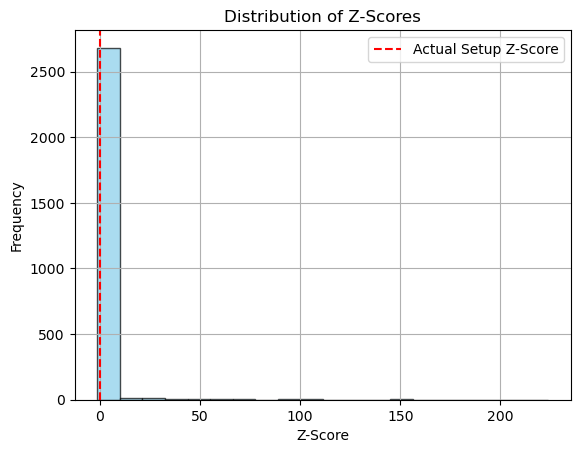

Z-score for actual setup: -1.6272964816784999e-19


In [8]:
import pandas as pd
import graph_tool.all as gt
import numpy as np
import matplotlib.pyplot as plt

def rewire_edges(graph):
    num_edges = graph.num_edges()
    edges = list(graph.edges())
    np.random.shuffle(edges)  

    rewired_graph = gt.Graph(graph)  
    rewired_graph.clear_edges()  

    for edge in edges:
        source, target = edge
        possible_targets = [v for v in rewired_graph.vertices() if v != source and not rewired_graph.edge(source, v)]
        new_target = np.random.choice(possible_targets)
        rewired_graph.add_edge(source, new_target)

    return rewired_graph

sorted_2024 = pd.read_csv('../Data/Cleaned files/sorted_2024.csv')  

# Assuming you have already created total_nv_network_2024 in another cell
degrees_real = total_nv_network_2024.degree_property_map('total')

num_iterations = 100
degrees_rewired = []
for i in range(num_iterations):
    rewired_graph = rewire_edges(total_nv_network_2024)
    degrees_rewired.append(rewired_graph.degree_property_map('total').a)

mean_degrees_rewired = np.mean(degrees_rewired, axis=0)
std_degrees_rewired = np.std(degrees_rewired, axis=0)
z_scores = (degrees_real.a - mean_degrees_rewired) / std_degrees_rewired

# Calculate the z-score for the actual setup
actual_z_score = np.mean((degrees_real.a - np.mean(degrees_real.a)) / np.std(degrees_real.a))

plt.hist(z_scores, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=actual_z_score, color='red', linestyle='--', label='Actual Setup Z-Score')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores')
plt.legend()
plt.grid(True)
plt.show()

print("Z-score for actual setup:", actual_z_score)